In [7]:
from flatsurf import *

In [101]:
a=2

In [102]:
b=2

In [103]:
c=1

In [104]:
A=polygons(vertices=[(0,0),(b,0),(b,a),(0,a)])

In [105]:
B=polygons(vertices=[(0,0),(c,0),(c,a),(0,a)])

In [106]:
C=polygons(vertices=[(0,0),(b,0),(b,c),(0,c)])

In [2]:
from flatsurf.geometry.surface import Surface

In [3]:
from flatsurf.geometry.polygon import Polygons

In [4]:
class CubeSurf(Surface):
    def __init__(self,F):
        ZZ3=IntegerModRing(3)
        P=Polygons(F)
        self._faceA=P(vertices=[(0,0),(1,0),(1,1),(0,1)])
        self._faceB=P(vertices=[(0,0),(1,0),(1,1),(0,1)])
        self._faceC=P(vertices=[(0,0),(1,0),(1,1),(0,1)])
        Surface.__init__(self,F,(ZZ(0),ZZ(0),ZZ3(0)), finite=False)
    def polygon(self, label):
        x,y,l=label
        if l==0:
            return self._faceA
        if l==1:
            return self._faceB
        if l==2:
            return self._faceC
    def opposite_edge(self,label,edge):
        x,y,l=label
        ## l(0)=A l(1)=B l(2)=C
        if l==0:
            if edge==0:
                return((x,y-1,l+2),2)
            if edge==1:
                return((x,y,l+1),3)
            if edge==2:
                return((x,y,l+2),0)
            if edge==3:
                return((x-1,y,l+1),1)
        if l==1:
            if edge==0:
                return((x+1,y-1,l+1),3)
            if edge==1:
                return((x+1,y,l+2),3)
            if edge==2:
                return((x,y,l+1),1)
            if edge==3:
                return((x,y,l+2),1)
        if l==2:
            if edge==0:
                return((x,y,l+1),2)
            if edge==1:
                return((x,y,l+2),2)
            if edge==2:
                return((x,y+1,l+1),0)
            if edge==3:
                return((x-1,y+1,l+2),0)

            
        

In [8]:
S=ConeSurface(CubeSurf(QQ))

In [9]:
TestSuite(S).run()

Failure in _test_pickling:
Traceback (most recent call last):
  File "/home/bitrat/Documents/sage-7.4/local/lib/python2.7/site-packages/sage/misc/sage_unittest.py", line 283, in run
    test_method(tester = tester)
  File "sage/structure/sage_object.pyx", line 620, in sage.structure.sage_object.SageObject._test_pickling (/home/bitrat/Documents/sage-7.4/src/build/cythonized/sage/structure/sage_object.c:5245)
    tester.assertEqual(loads(dumps(self)), self)
  File "/home/bitrat/Documents/sage-7.4/local/lib/python/unittest/case.py", line 515, in assertEqual
    assertion_func(first, second, msg=msg)
  File "/home/bitrat/Documents/sage-7.4/local/lib/python/unittest/case.py", line 508, in _baseAssertEqual
    raise self.failureException(msg)
AssertionError: ConeSurface built from infinitely many polygons != ConeSurface built from infinitely many polygons
------------------------------------------------------------
The following tests failed: _test_pickling


In [10]:
GS=S.graphical_surface()

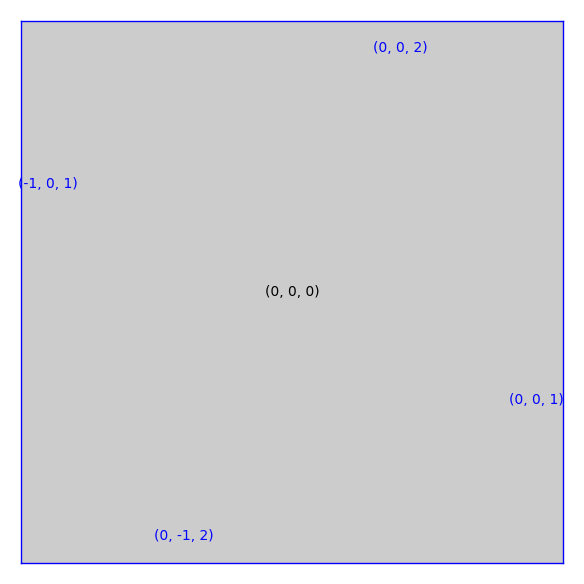

In [11]:
GS.plot()

In [12]:
S.base_label()

(0, 0, 0)

In [13]:
GS.make_adjacent_and_visible(S.base_label(),0)

In [14]:
for e in xrange(3):
    GS.make_adjacent_and_visible(S.base_label(),e)

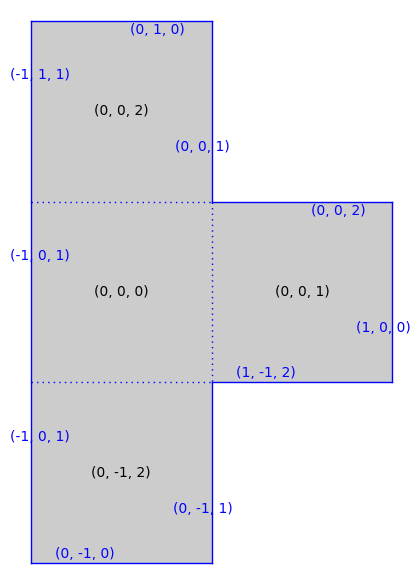

In [15]:
GS.plot()

In [16]:
from flatsurf.geometry.similarity import SimilarityGroup

In [17]:
SG=SimilarityGroup(QQ)

In [18]:
print SG(-1,-1,1,1)

(x, y) |-> (-x - y + 1, -x - y + 1)


In [19]:
print SG(0,0)

(x, y) |-> (x, y)


In [28]:
def default_position(label):
    x,y,l = label
    if(ZZ(l)==0):
        return SG(2*x,2*y) #(b+c)x,(a+c)y
    if(ZZ(l)==1):
        return SG(2*x+1,2*y) #(b+c)x + c, (a+c)y
    if(ZZ(l)==2):
        return SG(2*x,2*y+1) #(b+c)x, (a+c)y + c
    ##Reminder to parameterize a,b,c here for positions.
    ##Rework this to work for surfaces of different sizes.

In [29]:
from flatsurf.geometry.similarity_surface import *

In [33]:
GS=S.graphical_surface(cached=False,default_position_function=default_position,edge_labels=False,polygon_labels=False)

In [34]:
GS.make_all_visible(limit=40)

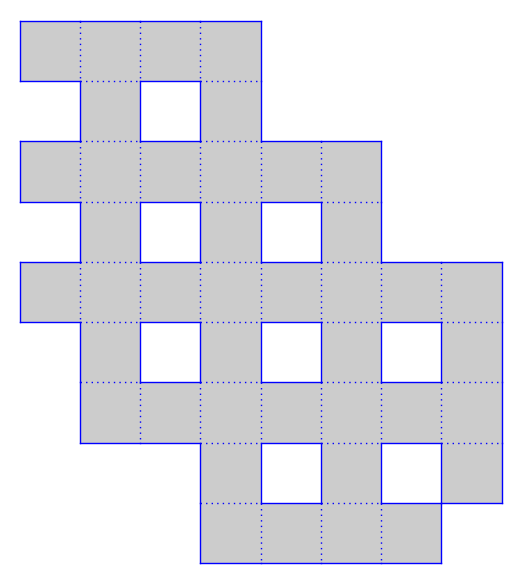

In [35]:
GS.plot()

In [36]:
GS=S.graphical_surface(cached=False,polygon_labels=None,edge_labels=None,default_position_function=default_position)

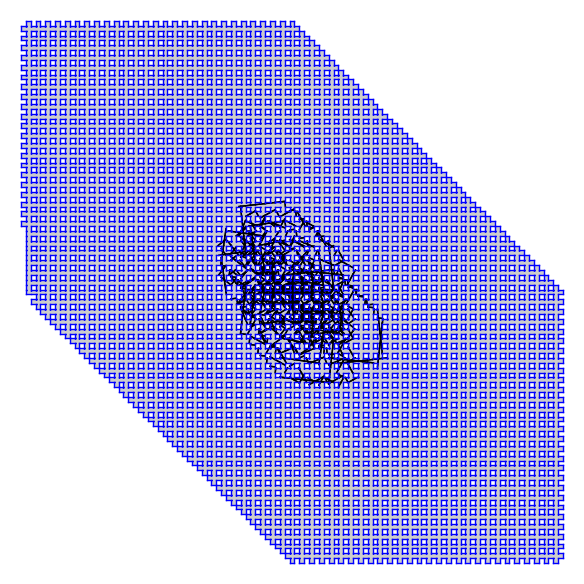

In [50]:
p=[]
for i in range(-5,5):
    for j in range(-5,5):
        v_x=2*i+1
        v_y=2*j+1
        unit=1
        v_x/=unit
        v_y/=unit
        v=S.tangent_vector(S.base_label(),(sqrt(2)/4,0),(v_x,v_y))
        traj=v.straight_line_trajectory()
        traj.flow(100)
        #print 'Trajectory is '
#if(traj.is_closed()):
#    print 'Closed'
#else:
#    print 'Drift'
        gtraj=traj.graphical_trajectory(GS)
        p.append(gtraj.plot())
GS.make_all_visible(limit=(2/3)*(traj.combinatorial_length()))
p.append(GS.plot())
sum(p)

In [39]:
traj=v.straight_line_trajectory()

In [126]:
traj.flow(100)


In [127]:
print traj.is_closed()

False


In [128]:
print traj.combinatorial_length()

101


In [129]:
gtraj=traj.graphical_trajectory(GS)

In [130]:
GS.make_all_visible(limit=traj.combinatorial_length()+2)

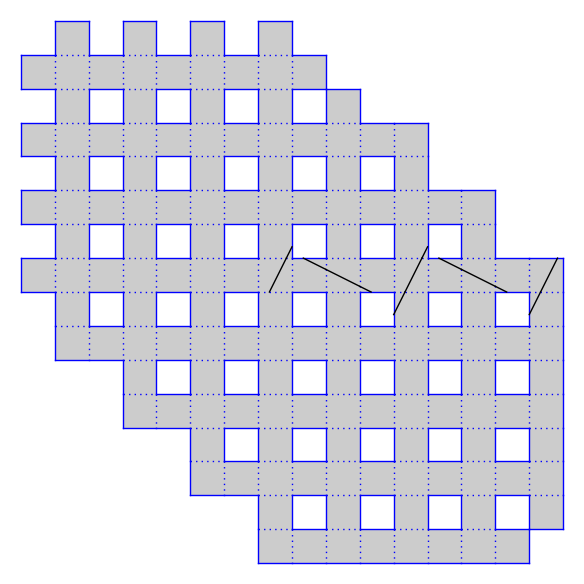

In [131]:
GS.plot()+gtraj.plot()